In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("city_day.csv")
df.head()

City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN

In [3]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [4]:
df.shape

(29531, 16)

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
# Extracting Year, Month, Day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
# Dropping Date column
df.drop(columns=['Date'], inplace=True)

In [6]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [7]:
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [8]:
df.isna().sum()

City             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
Year             0
Month            0
Day              0
dtype: int64

In [9]:
df['AQI'].fillna(method='ffill', inplace=True)
df['AQI_Bucket'].fillna(method='ffill', inplace=True)

C:\Users\Vinit Solanki\AppData\Local\Temp\ipykernel_14364\1682559575.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['AQI'].fillna(method='ffill', inplace=True)
C:\Users\Vinit Solanki\AppData\Local\Temp\ipykernel_14364\1682559575.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['AQI_Bucket'].fillna(method='ffill', inplace=True)


In [10]:
# Handling outliers using IQR method
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
# Capping extreme values beyond 1.5*IQR
df[num_cols] = np.clip(df[num_cols], Q1 - 1.5 * IQR, Q3 + 1.5 * IQR, axis=1)

In [11]:
df

City  PM2.5   PM10     NO    NO2    NOx    NH3    CO    SO2  \
0          Ahmedabad  48.57  95.68   0.92  18.22  17.15  15.85  0.92  25.39   
1          Ahmedabad  48.57  95.68   0.97  15.69  16.46  15.85  0.97  24.55   
2          Ahmedabad  48.57  95.68  17.40  19.30  29.70  15.85  2.64  25.39   
3          Ahmedabad  48.57  95.68   1.70  18.48  17.97  15.85  1.70  18.59   
4          Ahmedabad  48.57  95.68  22.10  21.42  37.76  15.85  2.64  25.39   
...              ...    ...    ...    ...    ...    ...    ...   ...    ...   
29526  Visakhapatnam  15.02  50.94   7.68  25.06  19.54  12.47  0.47   8.55   
29527  Visakhapatnam  24.38  74.09   3.42  26.06  16.53  11.99  0.52  12.72   
29528  Visakhapatnam  22.91  65.73   3.45  29.53  18.33  10.71  0.48   8.42   
29529  Visakhapatnam  16.64  49.97   4.05  29.26  18.80  10.03  0.52   9.84   
29530  Visakhapatnam  15.00  66.00   0.40  26.85  14.05   5.20  0.59   2.10   

           O3  Benzene  Toluene  Xylene    AQI    AQI_Bucket  Year  Month  Day  
0      75.715     0.00     0.02    0.98  118.0           NaN  2015      1    1  
1      34.060     3.68     5.50    0.98  118.0           NaN  2015      1    2  
2      30.700     5.69    13.13    0.98  118.0           NaN  2015      1    3  
3      36.080     4.43    10.14    0.98  118.0           NaN  2015      1    4  
4      39.310     5.69    13.13    0.98  118.0           NaN  2015      1    5  
...       ...      ...      ...     ...    ...           ...   ...    ...  ...  
29526  23.300     2.24    12.07    0.98   41.0          Good  2020      6   27  
29527  30.140     0.74     2.21    0.98   70.0  Satisfactory  2020      6   28  
29528  30.960     0.01     0.01    0.98   68.0  Satisfactory  2020      6   29  
29529  28.300     0.00     0.00    0.98   54.0  Satisfactory  2020      6   30  
29530  17.050     1.07     2.97    0.98   50.0          Good  2020      7    1  

[29531 rows x 18 columns]

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['City'] = le.fit_transform(df['City'])
df['AQI_Bucket'] = le.fit_transform(df['AQI_Bucket'])

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [15]:
df.to_csv("cleaned_aqi_dataset.csv", index=False)
print("Preprocessing complete. Cleaned dataset saved.")

Preprocessing complete. Cleaned dataset saved.


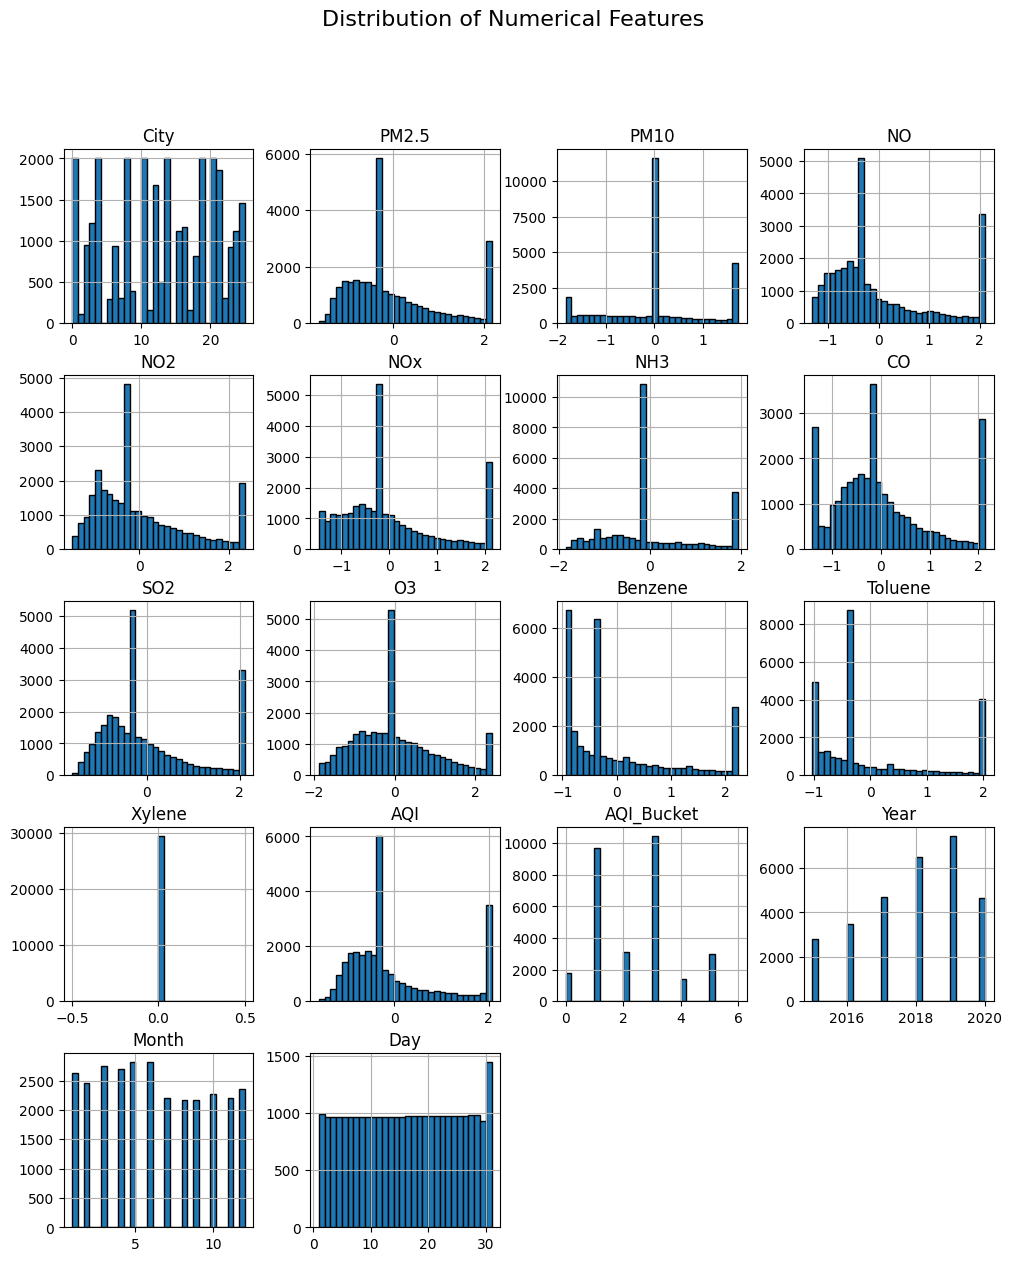

In [16]:
df = pd.read_csv("cleaned_aqi_dataset.csv")

# Plot histograms
df.hist(figsize=(12, 14), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

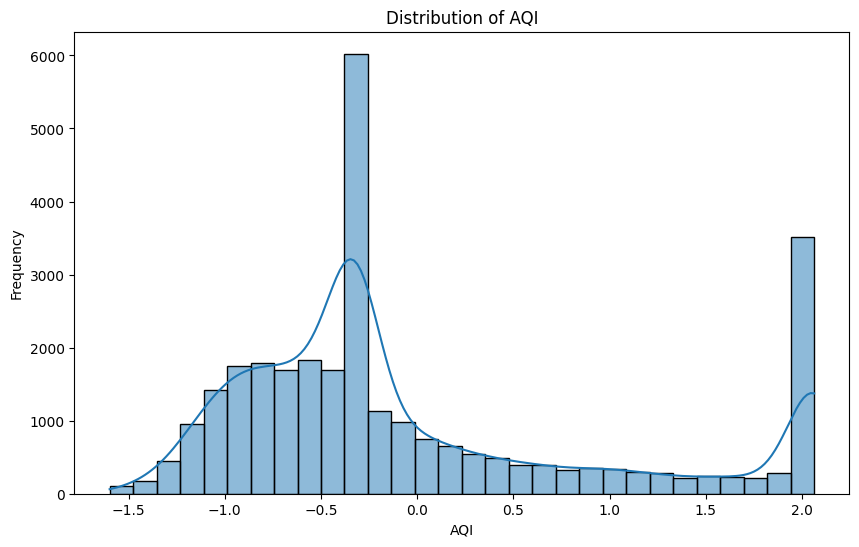

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AQI'], kde=True, bins=30)
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

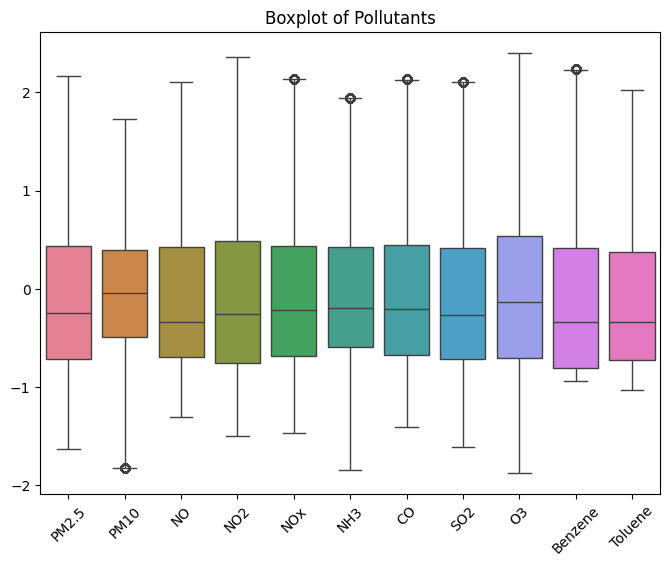

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']])
plt.xticks(rotation=45)
plt.title("Boxplot of Pollutants")
plt.show()

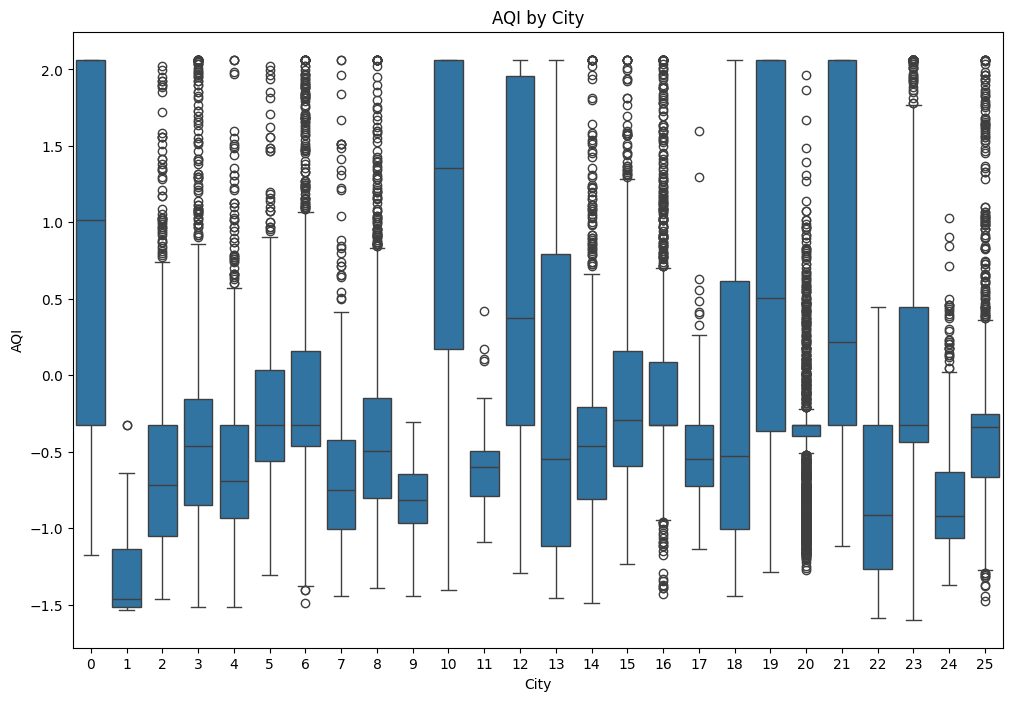

In [19]:
if 'City' in df.columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='City', y='AQI', data=df)
    plt.title('AQI by City')
    plt.xlabel('City')
    plt.ylabel('AQI')
    plt.show()

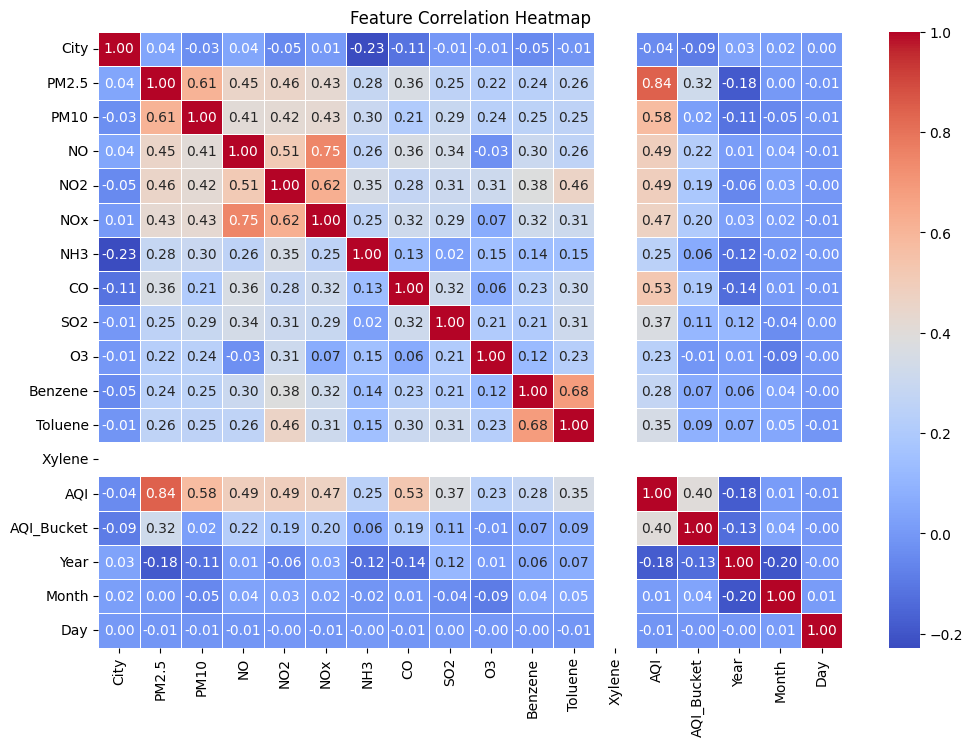

In [20]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [21]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df["PM2.5"], y=df["AQI"], scatter_kws={"alpha":0.5}, line_kws={"color":"blue"})
plt.title("Regression Plot of AQI vs PM2.5")
plt.xlabel("PM2.5 Levels")
plt.ylabel("AQI")
plt.grid()
plt.show()

Model Training, Testing and Evaluation

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
df = pd.read_csv("cleaned_aqi_dataset.csv")

In [24]:
df.isna().sum()

City          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
Year          0
Month         0
Day           0
dtype: int64

In [25]:
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
X = df[features]
y = df["AQI"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

LinearRegression()

In [28]:
print("Model Coefficients:", mlr_model.coef_)
print("Intercept:", mlr_model.intercept_)

Model Coefficients: [ 0.66259842  0.0626614   0.02131187  0.0307719   0.02781581 -0.02218568
  0.22053025  0.07155377  0.02452041 -0.02309724  0.05487827  0.        ]
Intercept: -0.0007202162324249466


In [29]:
y_pred = mlr_model.predict(X_test)

# Comparing actual vs predicted values
comparison_df = pd.DataFrame({"Actual AQI": y_test, "Predicted AQI": y_pred})
print(comparison_df.head())

       Actual AQI  Predicted AQI
22593   -0.327402      -0.526979
22459   -0.327402      -0.526979
24213   -0.097410      -0.069059
25301    0.544147       0.720180
20886    2.063305       1.556177


In [30]:
# evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R²): {r2}")

Mean Absolute Error (MAE): 0.3165791689386951
Mean Squared Error (MSE): 0.2059085100144702
Root Mean Squared Error (RMSE): 0.4537714292619911
R-Squared (R²): 0.7912012234170357


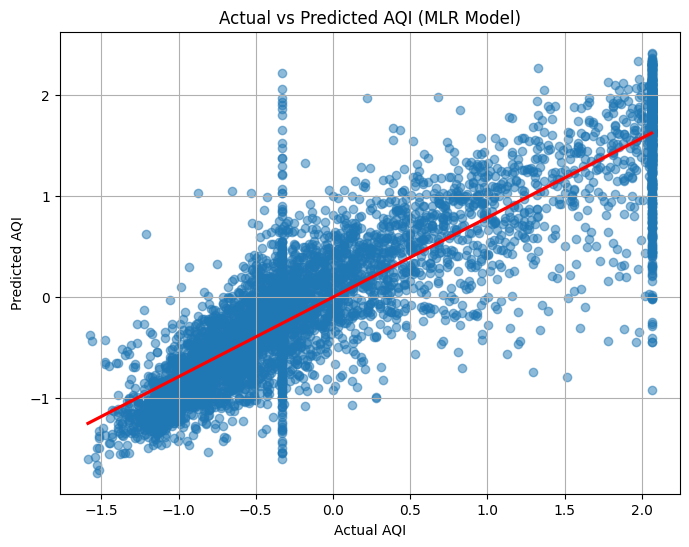

In [31]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI (MLR Model)")
plt.grid()
plt.show()

In [32]:
df["Date"] = pd.to_datetime(df[["Year", "Month", "Day"]])
# Group by week and take the mean of AQI and pollutants
df_weekly = df.groupby(pd.Grouper(key="Date", freq="W")).mean()
df_weekly.reset_index(inplace=True)
print(df_weekly.head())

        Date       City     PM2.5      PM10        NO       NO2       NOx  \
0 2015-01-04  10.320000  0.087282  0.203731 -0.231066 -0.342167 -0.222933   
1 2015-01-11  10.714286  0.098252  0.204767  0.222317  0.187937  0.021110   
2 2015-01-18  10.714286  0.098252  0.204767  0.237162  0.042651  0.125678   
3 2015-01-25  10.714286  0.095815  0.191041 -0.064450 -0.263890 -0.299929   
4 2015-02-01  10.714286  0.225171  0.189906  0.054169 -0.111199 -0.081368   

        NH3        CO       SO2        O3   Benzene   Toluene  Xylene  \
0 -0.112833  0.676313  0.462941 -0.417322  0.062761  0.300881     0.0   
1  0.142625  0.638029  0.446622 -0.385076  0.329840  0.345271     0.0   
2  0.063202  0.747507  0.321056 -0.275442  0.404165  0.476483     0.0   
3 -0.118319  0.967285  0.131151 -0.228494  0.250962  0.020355     0.0   
4 -0.094327  0.730538 -0.052651  0.031742  0.187905 -0.052356     0.0   

        AQI  AQI_Bucket    Year     Month        Day  
0 -0.028413    2.960000  2015.0  1.000000  

In [33]:
df_monthly = df.groupby(["Year", "Month"]).mean().reset_index()
print(df_monthly.head())

   Year  Month       City     PM2.5      PM10        NO       NO2       NOx  \
0  2015      1  10.668224  0.114191  0.198100  0.062805 -0.083797 -0.090199   
1  2015      2  10.714286  0.288594  0.183243 -0.052974 -0.012055  0.004397   
2  2015      3  10.714286  0.206257  0.062114 -0.124321 -0.106982  0.008914   
3  2015      4  10.714286  0.178300  0.135780 -0.149716 -0.146632 -0.072492   
4  2015      5  10.714286  0.093103  0.204767 -0.185286 -0.084963 -0.086396   

        NH3        CO       SO2        O3   Benzene   Toluene  Xylene  \
0 -0.008588  0.770963  0.238944 -0.249612  0.264279  0.208517     0.0   
1  0.293168  0.671077 -0.035333  0.052416  0.183153  0.187007     0.0   
2  0.037991  0.918452 -0.013726  0.257742  0.343649  0.457593     0.0   
3  0.089075  0.959977  0.201922  0.225972  0.042688 -0.053902     0.0   
4  0.218881  1.057755  0.228192  0.229598  0.269988 -0.152285     0.0   

        AQI  AQI_Bucket        Day                          Date  
0  0.030681    2.79

In [34]:
df_yearly = df.groupby("Year").mean().reset_index()
print(df_yearly.head())

   Year       City     PM2.5      PM10        NO       NO2       NOx  \
0  2015  11.512674  0.138603  0.111125 -0.053633 -0.182989  0.060780   
1  2016  12.687752  0.262115  0.070190 -0.039878  0.086431 -0.108315   
2  2017  13.192152  0.175568  0.063968 -0.085808  0.081692 -0.300019   
3  2018  13.261938  0.079767  0.155770  0.108936  0.227406  0.224387   
4  2019  13.127182 -0.099043 -0.038186  0.059895 -0.015154  0.108187   

        NH3        CO       SO2        O3   Benzene   Toluene  Xylene  \
0  0.235161  0.710767 -0.151728 -0.084679 -0.018131 -0.047299     0.0   
1  0.197141  0.064313 -0.260322  0.078213 -0.047449 -0.085234     0.0   
2  0.062556 -0.448943 -0.210662 -0.039659 -0.253313 -0.314022     0.0   
3 -0.026822  0.093519  0.174511  0.042125  0.072524  0.127385     0.0   
4 -0.139493  0.052647  0.163861 -0.047343  0.091275  0.164949     0.0   

        AQI  AQI_Bucket     Month        Day                          Date  
0  0.252075    2.433417  6.788290  15.761871 2015-0

In [35]:
df_weekly.to_csv("aqi_weekly.csv", index=False)
df_monthly.to_csv("aqi_monthly.csv", index=False)
df_yearly.to_csv("aqi_yearly.csv", index=False)

print("Weekly, Monthly, and Yearly AQI data saved successfully!")

Weekly, Monthly, and Yearly AQI data saved successfully!


<!-- Now  Trying the model with arema-->

In [36]:
from statsmodels.tsa.arima.model import ARIMA

In [37]:
aqi_series = df["AQI"]
# Fit ARIMA model (adjust p, d, q as needed)
arima_model = ARIMA(aqi_series, order=(3,1,3))  # (p,d,q) values can be optimized
arima_result = arima_model.fit()
df["ARIMA_Predicted_AQI"] = arima_result.fittedvalues

In [38]:
df['ARIMA_Predicted_AQI'].head()

0    0.000000
1   -0.327402
2   -0.327402
3   -0.327402
4   -0.327402
Name: ARIMA_Predicted_AQI, dtype: float64

In [39]:
X = df.drop(columns=["AQI", "AQI_Bucket", "ARIMA_Predicted_AQI", "Date"])  # Removing target and ARIMA prediction
y = df["AQI"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)
# Predicting AQI using MLR
df["MLR_Predicted_AQI"] = mlr_model.predict(X)

In [40]:
# Final Prediction = Weighted Combination of ARIMA and MLR Predictions
df["Hybrid_Predicted_AQI"] = (0.5 * df["ARIMA_Predicted_AQI"]) + (0.5 * df["MLR_Predicted_AQI"])

# Evaluate Hybrid Model
mae = mean_absolute_error(df["AQI"], df["Hybrid_Predicted_AQI"])
mse = mean_squared_error(df["AQI"], df["Hybrid_Predicted_AQI"])
rmse = np.sqrt(mse)
r2 = r2_score(df["AQI"], df["Hybrid_Predicted_AQI"])

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.2340
MSE: 0.1180
RMSE: 0.3435
R² Score: 0.8820


In [41]:
X = df.drop(columns=['AQI', 'AQI_Bucket'])
y = df['AQI']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop datetime columns if not needed
X_train = X_train.select_dtypes(exclude=['datetime64'])
X_test = X_test.select_dtypes(exclude=['datetime64'])

# Hyperparameter Tuning for Ridge and Lasso Regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge = GridSearchCV(Ridge(), ridge_params, cv=5)
lasso = GridSearchCV(Lasso(), lasso_params, cv=5)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

print(f"Best Ridge Alpha: {ridge.best_params_['alpha']}")
print(f"Best Lasso Alpha: {lasso.best_params_['alpha']}")

# Train Non-Linear Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Evaluate Models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {'Ridge': ridge.best_estimator_, 'Lasso': lasso.best_estimator_, 'RandomForest': rf, 'GradientBoosting': gb}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {name}, MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}")


Best Ridge Alpha: 10
Best Lasso Alpha: 0.01
Model: Ridge, MAE: 0.2217, MSE: 0.1163, RMSE: 0.3411, R² Score: 0.8820
Model: Lasso, MAE: 0.2210, MSE: 0.1164, RMSE: 0.3412, R² Score: 0.8819
Model: RandomForest, MAE: 0.1616, MSE: 0.0838, RMSE: 0.2896, R² Score: 0.9150
Model: GradientBoosting, MAE: 0.1764, MSE: 0.0877, RMSE: 0.2961, R² Score: 0.9111


In [42]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [44]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import pickle
with open("aqi_model.pkl", "wb") as file:
    pickle.dump(model, file)
print("Model saved successfully!")

Model saved successfully!


In [49]:
!pip install plotly


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Sample Data (Replace with actual AQI and location data)
data = pd.DataFrame({
    "latitude": [19.0760, 28.7041, 12.9716, 22.5726, 25.5941],  # Latitudes
    "longitude": [72.8777, 77.1025, 77.5946, 88.3639, 85.1376],  # Longitudes
    "AQI": [120, 250, 80, 190, 300]  # AQI Index
})

# Create a 3D Scatter Plot for AQI Mapping
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=data["longitude"],
    y=data["latitude"],
    z=data["AQI"],
    mode='markers',
    marker=dict(
        size=8,
        color=data["AQI"],  # Color by AQI level
        colorscale="Jet",  # Colors representing AQI severity
        colorbar=dict(title="AQI Index")
    )
))

# Set Layout
fig.update_layout(
    title="3D AQI Mapping",
    scene=dict(
        xaxis_title="Longitude",
        yaxis_title="Latitude",
        zaxis_title="AQI Index"
    )
)

fig.show()